### Python packages used in this code

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import platform
import sys
import seaborn as sns

%matplotlib inline

In [2]:
"""
Environments

--Platform--
OS : Windows-10-10.0.19044-SP0
--Version--
python :  3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
numpy : 1.23.1
pandas : 1.4.3
"""

print('--Platform--')
print('OS :', platform.platform())
print('--Version--')
print('python : ', sys.version)
print('numpy :', np.__version__)
print('pandas :', pd.__version__)

--Platform--
OS : Windows-10-10.0.19044-SP0
--Version--
python :  3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
numpy : 1.23.1
pandas : 1.4.3


## Load data

In [3]:
Results = pd.read_csv('../30_Output/30_csv/200_TransferLearning/300_TransferLearning_Result.csv', index_col=0)
Results2 = Results.copy()[[
    'No. source model', 
    'Itr', 
    'MSE (test, Wotl)', 
    'MSE (test, Fine)',
    'MSE (test, Ext-1)', 
    'MSE (test, Ext-2)', 
    'MSE (test, Ext-3)', 
    'MSE (test, Inv-1)', 
    'MSE (test, Inv-2)', 
    'MSE (test, Inv-3)'
]]

Results2['RMSE (test, Wotl)'] = np.sqrt(Results2['MSE (test, Wotl)']).values
Results2['RMSE (test, Fine)'] = np.sqrt(Results2['MSE (test, Fine)']).values
Results2['RMSE (test, Ext-1)'] = np.sqrt(Results2['MSE (test, Ext-1)']).values
Results2['RMSE (test, Ext-2)'] = np.sqrt(Results2['MSE (test, Ext-2)']).values
Results2['RMSE (test, Ext-3)'] = np.sqrt(Results2['MSE (test, Ext-3)']).values
Results2['RMSE (test, Inv-1)'] = np.sqrt(Results2['MSE (test, Inv-1)']).values
Results2['RMSE (test, Inv-2)'] = np.sqrt(Results2['MSE (test, Inv-2)']).values
Results2['RMSE (test, Inv-3)'] = np.sqrt(Results2['MSE (test, Inv-3)']).values

Results_plt = Results2[['RMSE (test, Ext-1)','RMSE (test, Ext-2)','RMSE (test, Ext-3)','RMSE (test, Inv-1)','RMSE (test, Inv-2)','RMSE (test, Inv-3)']]
Results2.mean()

No. source model        62.800000
Itr                      4.500000
MSE (test, Wotl)      3150.913569
MSE (test, Fine)      1413.183192
MSE (test, Ext-1)     1530.167914
MSE (test, Ext-2)     2759.620112
MSE (test, Ext-3)     3689.062721
MSE (test, Inv-1)     2175.023921
MSE (test, Inv-2)     1438.401480
MSE (test, Inv-3)     1354.627850
RMSE (test, Wotl)       39.616734
RMSE (test, Fine)       27.456161
RMSE (test, Ext-1)      28.464625
RMSE (test, Ext-2)      38.402612
RMSE (test, Ext-3)      44.395366
RMSE (test, Inv-1)      31.987806
RMSE (test, Inv-2)      28.215105
RMSE (test, Inv-3)      26.695852
dtype: float64

In [4]:
Results2.std()

No. source model        18.514532
Itr                      2.886751
MSE (test, Wotl)      5275.048219
MSE (test, Fine)      2236.421190
MSE (test, Ext-1)     2695.748885
MSE (test, Ext-2)     4688.150154
MSE (test, Ext-3)     6003.387659
MSE (test, Inv-1)     6921.345904
MSE (test, Inv-2)     2428.148017
MSE (test, Inv-3)     2574.335452
RMSE (test, Wotl)       39.967511
RMSE (test, Fine)       25.807023
RMSE (test, Ext-1)      26.966740
RMSE (test, Ext-2)      36.025517
RMSE (test, Ext-3)      41.658959
RMSE (test, Inv-1)      34.109215
RMSE (test, Inv-2)      25.471500
RMSE (test, Inv-3)      25.464559
dtype: float64

## Plot

In [5]:
# Dataframe for plot
Results2_plt = Results_plt.melt()
for i_plt in Results2_plt.index:
    if Results2_plt.loc[[i_plt],['variable']].values=='RMSE (test, Ext-1)':
        Results2_plt.loc[[i_plt],['Layer for plot']] = 0.97
        Results2_plt.loc[[i_plt],['Type']] = 'Feature extractor'
    if Results2_plt.loc[[i_plt],['variable']].values=='RMSE (test, Ext-2)':
        Results2_plt.loc[[i_plt],['Layer for plot']] = 1.97
        Results2_plt.loc[[i_plt],['Type']] = 'Feature extractor'
    if Results2_plt.loc[[i_plt],['variable']].values=='RMSE (test, Ext-3)':
        Results2_plt.loc[[i_plt],['Layer for plot']] = 2.97
        Results2_plt.loc[[i_plt],['Type']] = 'Feature extractor'
    if Results2_plt.loc[[i_plt],['variable']].values=='RMSE (test, Inv-1)':
        Results2_plt.loc[[i_plt],['Layer for plot']] = 1.03
        Results2_plt.loc[[i_plt],['Type']] = 'Affine transfer'
    if Results2_plt.loc[[i_plt],['variable']].values=='RMSE (test, Inv-2)':
        Results2_plt.loc[[i_plt],['Layer for plot']] = 2.03
        Results2_plt.loc[[i_plt],['Type']] = 'Affine transfer'
    if Results2_plt.loc[[i_plt],['variable']].values=='RMSE (test, Inv-3)':
        Results2_plt.loc[[i_plt],['Layer for plot']] = 3.03
        Results2_plt.loc[[i_plt],['Type']] = 'Affine transfer'
        
Results2_plt2 = Results2_plt.groupby(['variable', 'Type']).mean()
Results2_plt2 = Results2_plt.groupby(['variable']).mean()
Results2_plt2['Type'] = [
    'RMSE (test, Ext-1)',
    'RMSE (test, Ext-2)',
    'RMSE (test, Ext-3)',
    'RMSE (test, Inv-1)',
    'RMSE (test, Inv-2)',
    'RMSE (test, Inv-3)'
]
Results2_plt2['point_Type'] = [
    'Ext',
    'Ext',
    'Ext',
    'Inv',
    'Inv',
    'Inv'
]

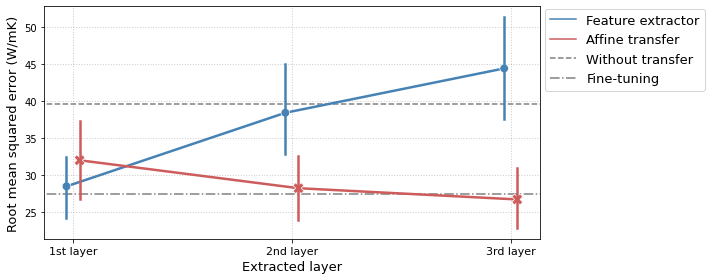

In [6]:
if not os.path.isdir('../30_Output/20_Plot/300_MakeResult'):
    os.makedirs('../30_Output/20_Plot/300_MakeResult')

plt.figure(figsize=(10,4))
# snsfig = 
snsfig = sns.lineplot(
    data=Results2_plt, 
    x='Layer for plot', 
    y='value', 
    hue='Type', 
    markers=False, 
    ci=90, 
    style='Type', 
    err_style="bars", 
    dashes=False, 
    palette=['steelblue', 'indianred'], 
    lw=2.5, 
    err_kws={'lw':2.5, 'zorder':6},
    zorder = 4
)
sns.scatterplot(
    data=Results2_plt2, 
    x='Layer for plot', 
    y='value', 
    hue='point_Type', 
    s=[75,75,75,120,120,120], 
    legend=False, 
    style='point_Type', 
    # palette=(['steelblue']*3+['indianred']*3),
    palette=(['steelblue']+['indianred']),
    zorder = 5
)
x_lim = snsfig.get_xlim()
plt.hlines(y=Results2.mean()['RMSE (test, Wotl)'], xmin=-1, xmax=4, color='gray', linestyles='dashed', lw=1.5, label='Without transfer', zorder=2)
plt.hlines(y=Results2.mean()['RMSE (test, Fine)'], xmin=-1, xmax=4, color='gray', linestyles='dashdot', lw=1.5, label='Fine-tuning', zorder=3)
plt.xlim(x_lim)
plt.xticks([1,2,3],['1st layer','2nd layer','3rd layer'], size=11)
plt.xlabel('Extracted layer', size=13)
plt.ylabel('Root mean squared error (W/mK)', size=13)
plt.legend(bbox_to_anchor=(1.01, 0.99), loc='upper left', borderaxespad=0, fontsize=13)
plt.grid(color='gray', linestyle='dotted', linewidth=1, alpha=0.4, zorder=1)
plt.tight_layout()
plt.savefig('../30_Output/20_Plot/300_MakeResult/300_Lineplot.pdf')